## 處理日期資訊
+ 可使用 pandas 的 date_range( ) 函數，可以建立日期資料。
+ 默認情況下，範圍的週期單位為天。
+ 若要表達出工作天 (不包含周六周日)，則請選擇 bdate_range( ) 方法。
+ date_range 或 bdate_range( ) 內的參數：
  + ('起始日期', periods=天數)
  + periods 由開始日取幾天
  + ('起始日期','結束日期')
  + 可加入另外一個參數：freq 代表範圍的週期單位
  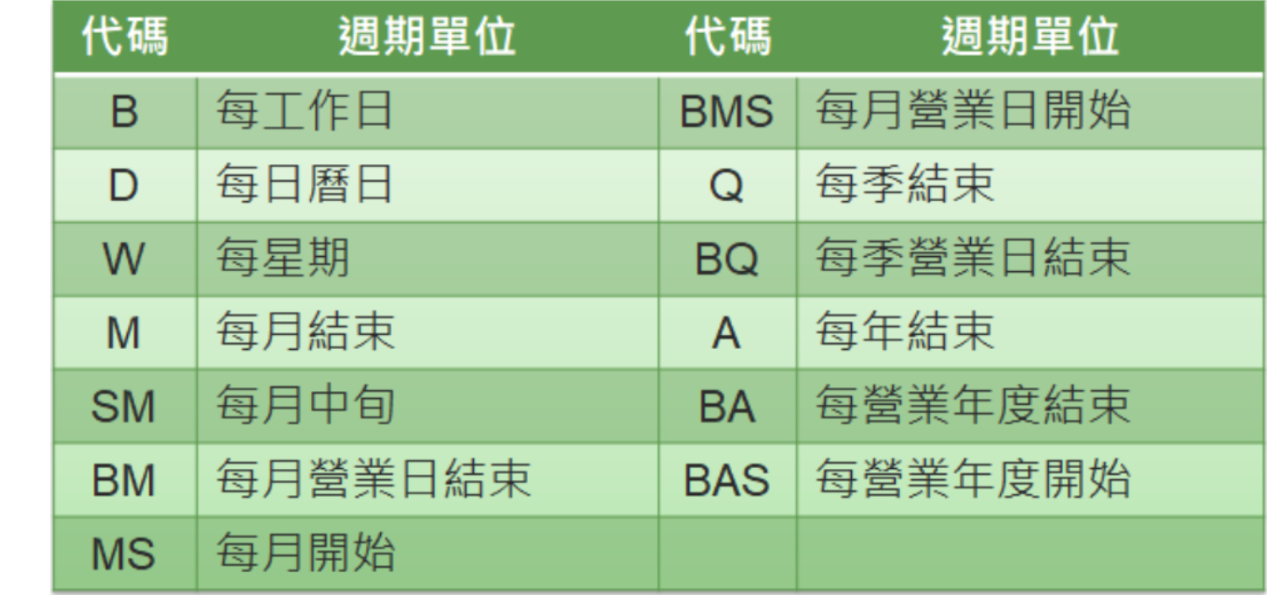
 https://pandas.pydata.org/docs/user_guide/timeseries.html

In [6]:
import pandas as pd
a = pd.date_range('2025/02/11',periods=10)
print(a)
a = pd.date_range("2025/02/11",periods=10,freq = 'W')
print(a)
a = pd.date_range("2025/02/11",periods=10,freq = 'W-Mon')
print(a)

DatetimeIndex(['2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14',
               '2025-02-15', '2025-02-16', '2025-02-17', '2025-02-18',
               '2025-02-19', '2025-02-20'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2025-02-16', '2025-02-23', '2025-03-02', '2025-03-09',
               '2025-03-16', '2025-03-23', '2025-03-30', '2025-04-06',
               '2025-04-13', '2025-04-20'],
              dtype='datetime64[ns]', freq='W-SUN')
DatetimeIndex(['2025-02-17', '2025-02-24', '2025-03-03', '2025-03-10',
               '2025-03-17', '2025-03-24', '2025-03-31', '2025-04-07',
               '2025-04-14', '2025-04-21'],
              dtype='datetime64[ns]', freq='W-MON')


In [8]:
import pandas as pd
from datetime import date
start = date(2025,2,11)
end = date(2025,5,30)
a = pd.date_range(start,end)
print(a)
a = pd.date_range(start,end,freq='W')
print(a)

DatetimeIndex(['2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14',
               '2025-02-15', '2025-02-16', '2025-02-17', '2025-02-18',
               '2025-02-19', '2025-02-20',
               ...
               '2025-05-21', '2025-05-22', '2025-05-23', '2025-05-24',
               '2025-05-25', '2025-05-26', '2025-05-27', '2025-05-28',
               '2025-05-29', '2025-05-30'],
              dtype='datetime64[ns]', length=109, freq='D')
DatetimeIndex(['2025-02-16', '2025-02-23', '2025-03-02', '2025-03-09',
               '2025-03-16', '2025-03-23', '2025-03-30', '2025-04-06',
               '2025-04-13', '2025-04-20', '2025-04-27', '2025-05-04',
               '2025-05-11', '2025-05-18', '2025-05-25'],
              dtype='datetime64[ns]', freq='W-SUN')


In [13]:
import pandas as pd
from  datetime import  date
import  numpy as np
dates = pd.date_range("20250211",periods=200)
se = pd.Series(np.arange(1,201),index = dates)
print(se)
se1 = se.sum()
print(se1)
se2 = se.resample("ME").sum()
print(se2)
se3 = se.resample("QE").sum()
print(se3)
se.to_csv("se.csv")

2025-02-11      1
2025-02-12      2
2025-02-13      3
2025-02-14      4
2025-02-15      5
             ... 
2025-08-25    196
2025-08-26    197
2025-08-27    198
2025-08-28    199
2025-08-29    200
Freq: D, Length: 200, dtype: int32
20100
2025-02-28     171
2025-03-31    1054
2025-04-30    1935
2025-05-31    2945
2025-06-30    3765
2025-07-31    4836
2025-08-31    5394
Freq: ME, dtype: int32
2025-03-31     1225
2025-06-30     8645
2025-09-30    10230
Freq: QE-DEC, dtype: int32


In [16]:
import pandas as pd
from  datetime import  date
import  numpy as np
df = pd.read_csv("se.csv",names=["Date","num"])
print(df)
se2 = df.resample("ME").sum()

           Date  num
0           NaN    0
1    2025-02-11    1
2    2025-02-12    2
3    2025-02-13    3
4    2025-02-14    4
..          ...  ...
196  2025-08-25  196
197  2025-08-26  197
198  2025-08-27  198
199  2025-08-28  199
200  2025-08-29  200

[201 rows x 2 columns]


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [22]:
import pandas as pd
from  datetime import  date
import  numpy as np
df = pd.read_csv("se.csv",
                 names=["Date","num"])
print(df.index)
print(df.dtypes)
df["Date"] = pd.to_datetime(df["Date"])
print(df.dtypes)
df.set_index("Date",inplace=True)
print(df.index)
se2 = df.resample("ME").sum()
print(se2)

RangeIndex(start=0, stop=201, step=1)
Date    object
num      int64
dtype: object
Date    datetime64[ns]
num              int64
dtype: object
DatetimeIndex([       'NaT', '2025-02-11', '2025-02-12', '2025-02-13',
               '2025-02-14', '2025-02-15', '2025-02-16', '2025-02-17',
               '2025-02-18', '2025-02-19',
               ...
               '2025-08-20', '2025-08-21', '2025-08-22', '2025-08-23',
               '2025-08-24', '2025-08-25', '2025-08-26', '2025-08-27',
               '2025-08-28', '2025-08-29'],
              dtype='datetime64[ns]', name='Date', length=201, freq=None)
             num
Date            
2025-02-28   171
2025-03-31  1054
2025-04-30  1935
2025-05-31  2945
2025-06-30  3765
2025-07-31  4836
2025-08-31  5394


## 判斷遺失值產生原因
+ 有些資訊是暫時無法讀取。
+ 有些資訊是被遺漏。
+ 有些對象的某些屬性特徵是不存在。
+ 有些資訊被認為不重要。
+ 操作這些資訊的代價太大而被遺棄。

In [38]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
1.0,2.0,x,4
5.5,34,3.4,x
10,x,11.5,8.5
'''
data3=pd.read_csv(StringIO(csv_data))
print(data3)
data3.replace("x",np.NaN,inplace=True)
print(data3.isnull().any())
print(data3.isnull().sum())
print(data3.dtypes)
for x in data3:
   if data3[x].dtype == 'object':
       data3[x] = data3[x].astype('float16')
print(data3.dtypes) 
print(data3.mean())

      A    B     C    D
0   1.0  2.0     x    4
1   5.5   34   3.4    x
2  10.0    x  11.5  8.5
A    False
B     True
C     True
D     True
dtype: bool
A    0
B    1
C    1
D    1
dtype: int64
A    float64
B     object
C     object
D     object
dtype: object
A    float64
B    float16
C    float16
D    float16
dtype: object
A     5.500000
B    18.000000
C     7.449219
D     6.250000
dtype: float64


## 丟棄遺失值
+ 您可以使用 dropna 方法再搭配 axis 參數方式進行搭配。
+ 默認情況下，預設為 axis = 0，也就是會沿著 Rows 進行，當發現到任何值為 NA 就會整個 Row 刪除。
+ 若加入參數 how=‘all’ 代表整個 Row 資料都是遺失值情況下才可以刪除丟棄。
+ 加入參數 thresh=N 代表刪除包含少於 N 個觀察值的 row。

In [47]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
drop=pd.read_csv(StringIO(csv_data))
print(drop)
droup1 = drop.dropna(axis=0)
print("="*70)
print(droup1)
print("="*70)
droup2 = drop.dropna(axis=1)
print(droup2)
print("="*70)
droup3 = drop.dropna(axis=0,how="all")
print(droup3)
#C 與 D都不是NaN的
droup4 = drop.dropna(subset=['C','D'])
print("="*70)
print(droup4)
print("="*70)
droup5 = drop.dropna(thresh=2)#不是NaN至少2個就不移除
print(droup5)

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
Empty DataFrame
Columns: [A, B, C, D, E]
Index: []
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5]
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
      A    B     C    D   E
0   2.0  3.0   4.0  5.0 NaN
2  10.0  NaN  11.0  8.0 NaN
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
4   3.0   NaN   3.0  NaN NaN


## 填充遺失值
+ 可使用 fillna 函數進行填充
  + 輸入要填充的數值
    + 補上中位數：建議補上中位數而非平均值，這樣相對來說不會受到極端值的影響。
    + 根據原本的資料分布補上亂數。
+ 以下兩種方式可以向後或者向前進行填充
   + pad/ffill          代表向後填充
   + bfill/backfill   代表向前填充

In [51]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
fill=pd.read_csv(StringIO(csv_data))
print(fill)
fill_zero = fill.fillna(0)
print(fill_zero)
fill_zero = fill.fillna(0,limit=2)
print(fill_zero)
fill3 = fill.ffill()#一直往前找直到有值將這數值填入當前NaN
print(fill3)
fill4 = fill.bfill()#一直往後找直到有值將這數值填入當前NaN
print(fill4)

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
      A     B     C    D    E
0   2.0   3.0   4.0  5.0  0.0
1   6.0  34.0   6.0  0.0  0.0
2  10.0   0.0  11.0  8.0  0.0
3   0.0   0.0   0.0  0.0  0.0
4   3.0   0.0   3.0  0.0  0.0
5   0.0   5.0   0.0  0.0  0.0
      A     B     C    D    E
0   2.0   3.0   4.0  5.0  0.0
1   6.0  34.0   6.0  0.0  0.0
2  10.0   0.0  11.0  8.0  NaN
3   0.0   0.0   0.0  0.0  NaN
4   3.0   NaN   3.0  NaN  NaN
5   0.0   5.0   0.0  NaN  NaN
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  5.0 NaN
2  10.0  34.0  11.0  8.0 NaN
3  10.0  34.0  11.0  8.0 NaN
4   3.0  34.0   3.0  8.0 NaN
5   3.0   5.0   3.0  8.0 NaN
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  8.0 NaN
2  10.0   5.0  11.0  8.0 NaN
3   3.0   5.0   3.0  NaN NaN
4   3.0   5.0   3.0  NaN NaN


In [54]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
fill=pd.read_csv(StringIO(csv_data))
print(fill)
fillmean = fill.mean()
print(fillmean)
for x in fill:
    my_fill = fill[x]
    my_fill.fillna(fillmean.loc[x],inplace=True)
print(fill)    

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
A     5.25
B    14.00
C     6.00
D     6.50
E      NaN
dtype: float64
       A     B     C    D   E
0   2.00   3.0   4.0  5.0 NaN
1   6.00  34.0   6.0  6.5 NaN
2  10.00  14.0  11.0  8.0 NaN
3   5.25  14.0   6.0  6.5 NaN
4   3.00  14.0   3.0  6.5 NaN
5   5.25   5.0   6.0  6.5 NaN


### 檢查重複

In [57]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df2=pd.read_csv(StringIO(csv_data))
print(df2)
print(df2.duplicated())
print("="*70)
print(df2.duplicated("A"))
print("="*70)
print(df2.duplicated("D"))

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
0    False
1    False
2     True
3    False
dtype: bool
0    False
1    False
2     True
3    False
dtype: bool
0    False
1     True
2     True
3     True
dtype: bool


### 丟棄重複值的資料

In [64]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df2=pd.read_csv(StringIO(csv_data))
print(df2)
print("="*70)
print(df2.drop_duplicates(keep="last"))
print("="*70)
print(df2.drop_duplicates(keep=False))
print("="*70)
print(df2.drop_duplicates(subset=['C','D']))
print("="*70)
print(df2.drop_duplicates(subset=['C','D'],keep="last"))
print("="*70)
print(df2.drop_duplicates(subset=['A','D'],keep=False))

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
3  13  23  5  5
   A  B  C  D
0  2  3  5  5
    A   B  C  D
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
3  13  23  5  5


## Pand群組

In [66]:
import pandas as pd
import numpy as np
company=["A","B","C"]
data1=pd.DataFrame(
{"company":[company[x] for x in np.random.randint(0,len(company),20)],
"salary":np.random.randint(5,50,20),
"age":np.random.randint(15,50,20)}    
)
print(data1)

   company  salary  age
0        B      26   30
1        A       9   17
2        A      37   32
3        A       7   30
4        C      16   49
5        C      35   39
6        A      49   34
7        A      16   42
8        B      39   46
9        C      17   27
10       A      38   26
11       C      19   18
12       A      49   48
13       C      47   44
14       A      27   28
15       B      44   16
16       A      11   29
17       B      27   24
18       A      26   16
19       C      49   37


In [67]:
group = data1.groupby("company")
print(list(group))

[('A',    company  salary  age
1        A       9   17
2        A      37   32
3        A       7   30
6        A      49   34
7        A      16   42
10       A      38   26
12       A      49   48
14       A      27   28
16       A      11   29
18       A      26   16), ('B',    company  salary  age
0        B      26   30
8        B      39   46
15       B      44   16
17       B      27   24), ('C',    company  salary  age
4        C      16   49
5        C      35   39
9        C      17   27
11       C      19   18
13       C      47   44
19       C      49   37)]


In [69]:
import pandas as pd
fortune = pd.read_csv("fortune1000.csv",index_col='Rank',encoding="utf-8")
print(fortune)
print("="*100)
sectors = fortune.groupby("Sector")
print(sectors.size())


                         Company                        Sector  \
Rank                                                             
1                        Walmart                     Retailing   
2                    Exxon Mobil                        Energy   
3                          Apple                    Technology   
4             Berkshire Hathaway                    Financials   
5                       McKesson                   Health Care   
...                          ...                           ...   
996   New York Community Bancorp                    Financials   
997    Portland General Electric                        Energy   
997    Portland General Electric                        Energy   
999                      Wendy’s  Hotels, Resturants & Leisure   
1000           Briggs & Stratton                   Industrials   

                                      Industry           Location  Revenue  \
Rank                                                           

In [71]:
print(sectors.get_group('Energy').head(5))
print(sectors.get_group('Energy').max())
print(sectors.get_group('Energy').min())

                 Company  Sector            Industry         Location  \
Rank                                                                    
2            Exxon Mobil  Energy  Petroleum Refining       Irving, TX   
14               Chevron  Energy  Petroleum Refining    San Ramon, CA   
30           Phillips 66  Energy  Petroleum Refining      Houston, TX   
32         Valero Energy  Energy  Petroleum Refining  San Antonio, TX   
42    Marathon Petroleum  Energy  Petroleum Refining      Findlay, OH   

      Revenue  Profits  Employees  
Rank                               
2      246204    16150      75600  
14     131118     4587      61500  
30      87169     4227      14000  
32      81824     3990      10103  
42      64566     2852      45440  
Company                      Xcel Energy
Sector                            Energy
Industry     Utilities: Gas and Electric
Location                  Washington, DC
Revenue                           246204
Profits                        

In [74]:
print(sectors.sum(numeric_only=True))
print(sectors.mean(numeric_only=True))

                              Revenue  Profits  Employees
Sector                                                   
Aerospace & Defense            357940    28742     968057
Apparel                         95968     8236     346397
Business Services              272195    28227    1361050
Chemicals                      243897    22628     463651
Energy                        1517809   -73447    1188927
Engineering & Construction     153983     5304     406708
Financials                    2217159   260209    3359948
Food and Drug Stores           483769    16759    1395398
Food, Beverages & Tobacco      555967    51417    1211632
Health Care                   1614707   106114    2678289
Hotels, Resturants & Leisure   169546    20697    2484245
Household Products             234737    14428     646038
Industrials                    497581    20764    1545229
Materials                      259145     4428     638123
Media                          220764    24347     550314
Motor Vehicles

In [78]:
print(sectors.agg({"Revenue":["size","sum","mean"],"Employees":"mean"}))

                             Revenue                            Employees
                                size      sum          mean          mean
Sector                                                                   
Aerospace & Defense               20   357940  17897.000000  48402.850000
Apparel                           15    95968   6397.866667  23093.133333
Business Services                 51   272195   5337.156863  26687.254902
Chemicals                         30   243897   8129.900000  15455.033333
Energy                           122  1517809  12441.057377   9745.303279
Engineering & Construction        26   153983   5922.423077  15642.615385
Financials                       139  2217159  15950.784173  24172.287770
Food and Drug Stores              15   483769  32251.266667  93026.533333
Food, Beverages & Tobacco         43   555967  12929.465116  28177.488372
Health Care                       75  1614707  21529.426667  35710.520000
Hotels, Resturants & Leisure      25  